In [1]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt

import tensorflow as tf


/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
with tf.Graph().as_default() as g:
    #构建输入输出
    inp_out=tf.placeholder(shape=[None,784],dtype=tf.float32)
    #构建隐藏层神经元数量，激活函数
    h=tf.keras.layers.Dense(32,activation=tf.nn.relu)(inp_out)#括号中代表调用神经元实力化的对象
    #输出
    out=tf.keras.layers.Dense(784,activation=tf.nn.sigmoid)(h)
    
    #代价函数
    loss=tf.reduce_mean(tf.keras.losses.mean_squared_error(inp_out,out))#reduce_mean先求和再求平均
    #保存模型
    saver=tf.train.Saver()
    

0.23259741


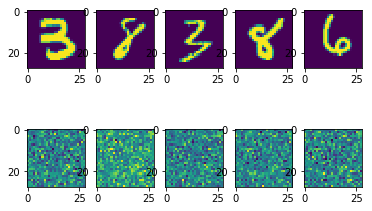

0.22369835


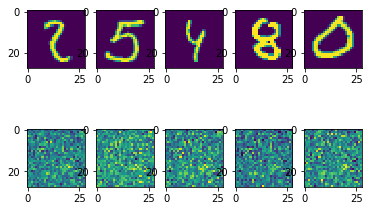

0.18982084


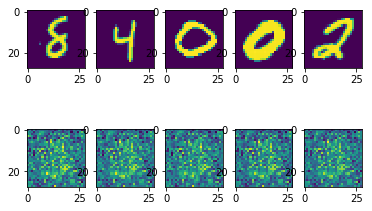

0.115833886


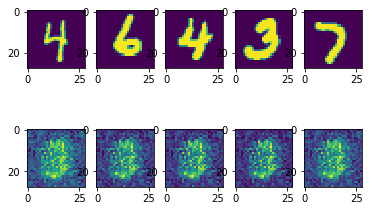

0.085664004


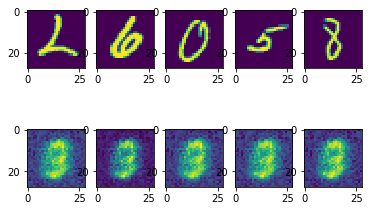

0.072256595


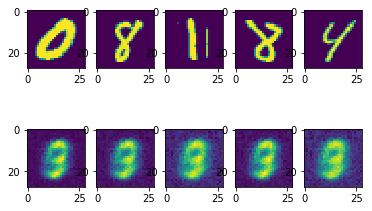

0.07118371


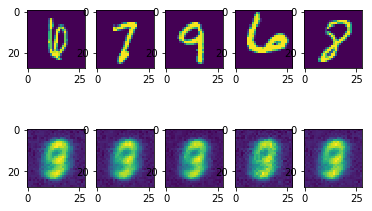

0.07306062


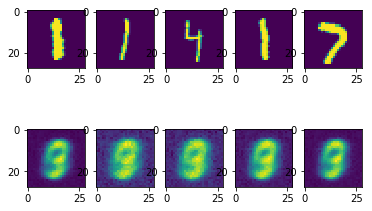

0.07084848


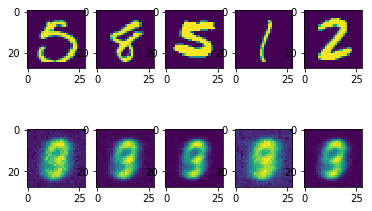

0.070534006


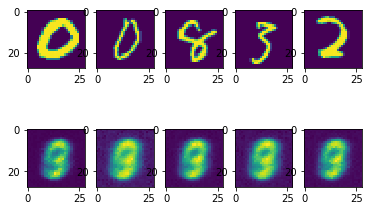

In [29]:
with tf.Session(graph=g) as sess:
    #定义优化器
    optim=tf.train.GradientDescentOptimizer(learning_rate=0.03)#梯度下降
    train_op = optim.minimize(loss)#最小化代价
    sess.run(tf.global_variables_initializer())
   
    for i in range(10000):
        batch_img,_=mnist.train.next_batch(32)#返回batchimg和batchlabel，label无用所以用-替代
        res_loss,_=sess.run([loss,train_op],feed_dict={inp_out:batch_img})
        if i%1000==0:
            print(res_loss)
            batch_img,_=mnist.test.next_batch(5)
            res_out=sess.run(out,feed_dict={inp_out:batch_img})
            
            for j in range(10):
                plt.subplot(2,5,j+1)
                if j<5:
                    img=batch_img[j]
                else: 
                    img=res_out[j-5]
                img=(img*255).astype(np.uint8).reshape([28,28])
                plt.imshow(img)
            plt.show()
                #plt.imshow ((img*255).astype(np.uint8).reshape([28,28]))
                

In [ ]:
#自编码器的输出浮现输入
#有损压缩
#隐藏层维度小于输入层
#解码器不一定是训练时的输出层还可以使机器学习模型